<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Normal_vs_large_cup_fundus_image_CNN_classification_and_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
# import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import cv2

## Accessing the main directory

In [2]:
os.listdir('/content/drive/MyDrive/Fundus image dataset')

['Large optic cup', 'Normal optic cup']

## Looking for image id in the Large optic cup subdirectory

In [3]:
# locating all the images in the Large optic cup subdirectory
Large_cup = glob.glob('/content/drive/MyDrive/Fundus image dataset/Large optic cup/*.JPG')
# finding the length of number of images in the Large optic cup subdirectory
print(len(Large_cup))
# showing id of first five Large optic cup images
Large_cup[:5]

50


['/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa949e-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa94a7-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa94a2-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa94a6-8d87-11e8-9daf-6045cb817f5b..JPG']

# Looking for image id in the Normal optic cup subdirectory

In [4]:
# locating all the images in the Normal optic cup subdirectory
Normal_cup = glob.glob('/content/drive/MyDrive/Fundus image dataset/Normal optic cup/*.JPG')
# finding the length of number of images in the Normal optic cup subdirectory
print(len(Normal_cup))
# showing id of first five Large optic cup images
Normal_cup[:5]

38


['/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa962a-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa9629-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa962d-8d87-11e8-9daf-6045cb817f5b..JPG']

## Visualising images in the Large optic cup subdirectory

<ipython-input-5-84f65f739adb>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


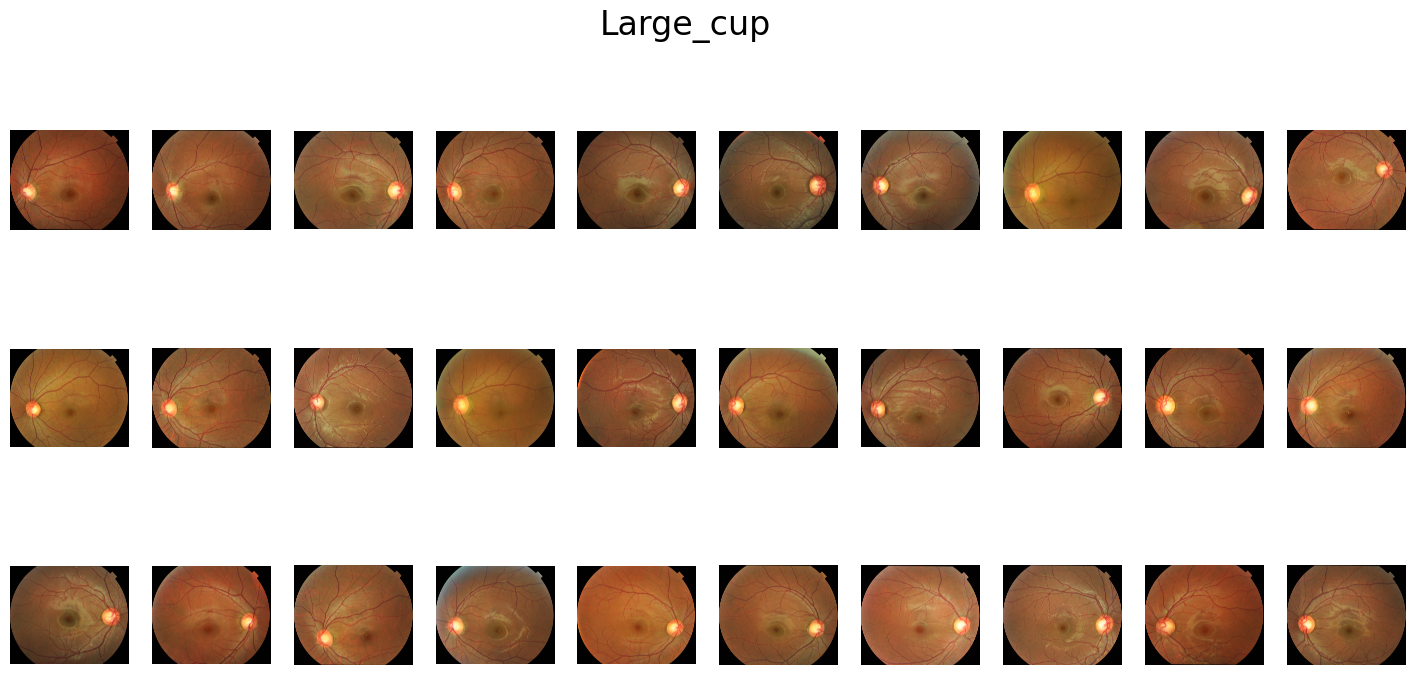

In [5]:
# IMAGES
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Large_cup', fontsize=24)
for ind, img_src in enumerate(Large_cup[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

# Visualising images in the Normal optic cup subdirectory

<ipython-input-6-3f79c6ff7148>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


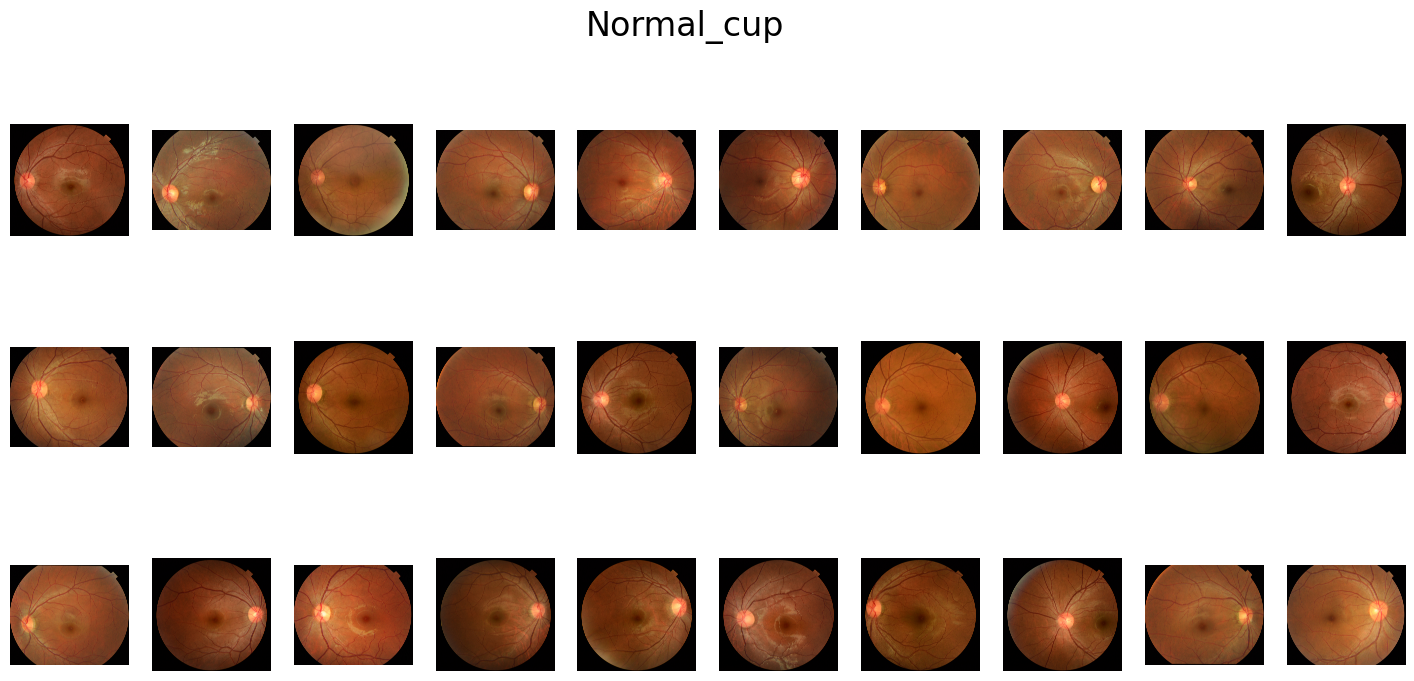

In [6]:
# IMAGES
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Normal_cup', fontsize=24)
for ind, img_src in enumerate(Normal_cup[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

## Exploring the image dimension in the subdirectories

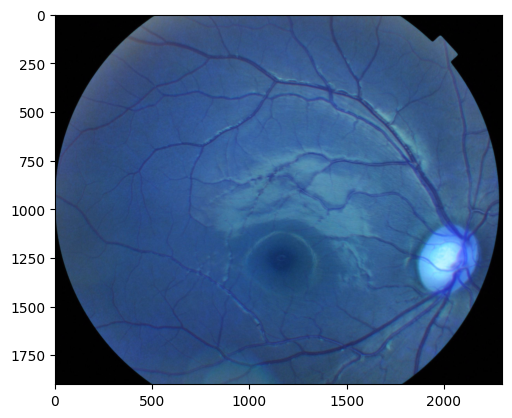

In [7]:
# Displaying Large opitc cup dimensions
import cv2
image = cv2.imread('/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image)


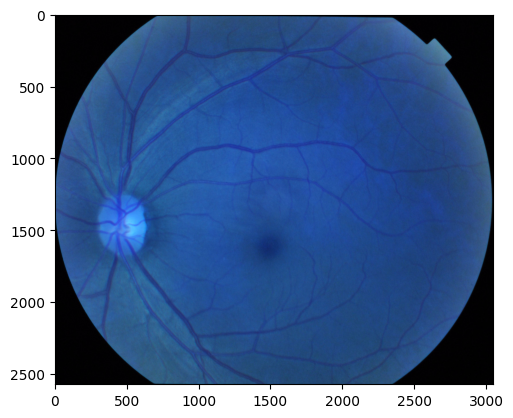

In [8]:
# Displaying normal optic cup dimensions
import cv2
image = cv2.imread('/content/drive/MyDrive/Fundus image dataset/Normal optic cup/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image)


## Importing libraries for CNN model architecture design

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [40]:
# MODEL
# model parameters
# Number of training examples to process
BATCH_SIZE =5
# setting our training data images with 150 pixels width and 150 pixels height
IMG_SHAPE  = 150
TARGET_SIZE = 64
EPOCHS = 15

## Initializing coding and compiling the model

In [32]:
# Model initialization
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Looking at the model summary

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

## Fully connected network flowchart

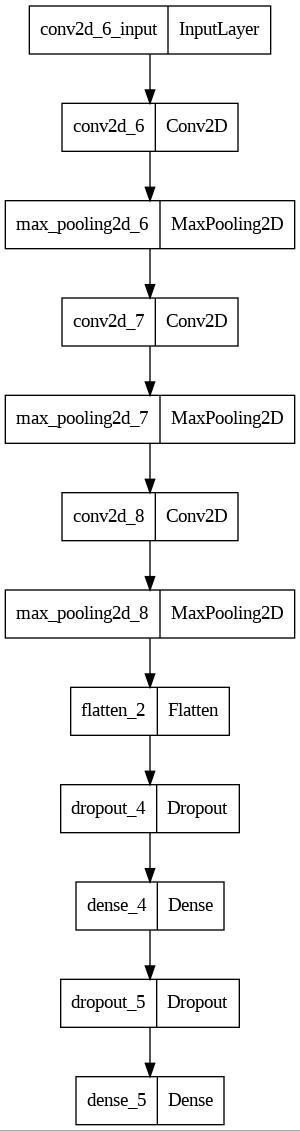

<Figure size 500x1000 with 0 Axes>

In [34]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.jpg")

## Image augmentation

In [35]:
# DATA GENERTOR

datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)
train_data = datagen.flow_from_directory('/content/drive/MyDrive/Fundus image dataset',
                             target_size=(150,150),
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             class_mode='binary',
                             subset='training')
test_data = datagen.flow_from_directory('/content/drive/MyDrive/Fundus image dataset',

                             target_size=(150,150),
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             class_mode='binary',
                             subset='training')
validation_data = datagen.flow_from_directory('/content/drive/MyDrive/Fundus image dataset',
                             target_size=(150,150),
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             class_mode='binary',
                             subset='validation')


Found 62 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


## Calling for early stopping of the model at highest accuracy achieved

In [36]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta = 0.01,
                               patience=5)
# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

# Fitting the model

In [41]:
# MODEL FIT
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping, model_save])

Epoch 1/15
13/13 [==============================] - 8s 582ms/step - loss: 0.3958 - accuracy: 0.8226 - val_loss: 0.4190 - val_accuracy: 0.8462


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
13/13 [==============================] - 12s 969ms/step - loss: 0.4820 - accuracy: 0.8065 - val_loss: 0.4560 - val_accuracy: 0.8077
Epoch 3/15
13/13 [==============================] - 9s 652ms/step - loss: 0.5404 - accuracy: 0.7419 - val_loss: 0.6081 - val_accuracy: 0.6923
Epoch 4/15
13/13 [==============================] - 9s 670ms/step - loss: 0.5197 - accuracy: 0.7581 - val_loss: 0.6133 - val_accuracy: 0.6538
Epoch 5/15
13/13 [==============================] - 10s 773ms/step - loss: 0.5739 - accuracy: 0.7581 - val_loss: 0.5511 - val_accuracy: 0.6923
Epoch 6/15
13/13 [==============================] - 7s 540ms/step - loss: 0.4730 - accuracy: 0.7903 - val_loss: 0.5436 - val_accuracy: 0.7308


## Plotting models metrics on the accuracy and accuracy loss, and validation accuracy and validation loss

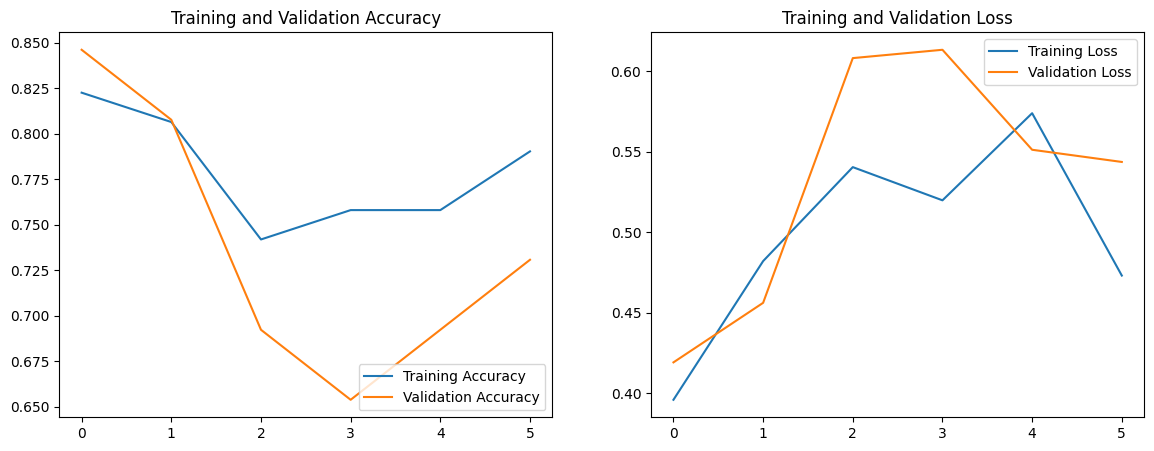

In [42]:
0# PLOT METRICS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Prediction on test image

In [43]:
test_model = model.evaluate(test_data)
print('The testing accuracy is :',test_model[1]*100, '%')

13/13 [==============================] - 4s 285ms/step - loss: 0.4370 - accuracy: 0.7742
The testing accuracy is : 77.4193525314331 %


In [44]:
preds = model.predict(test_data,verbose=1)

13/13 [==============================] - 4s 283ms/step


In [45]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

## Plotting confusion matrix

<Axes: >

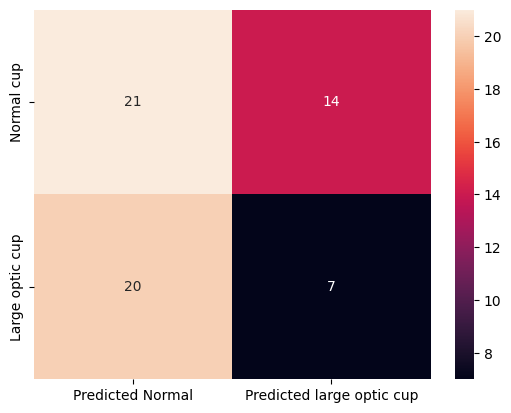

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

cm = pd.DataFrame(data=confusion_matrix(test_data.classes, predictions,
                        labels=[0, 1]),index=["Normal cup", "Large optic cup"],
columns=["Predicted Normal", "Predicted large optic cup"])
sns.heatmap(cm,annot=True,fmt="d")


# Classification report

In [47]:
print(classification_report(y_true=test_data.classes,y_pred=predictions,
                            target_names =['Normal cup','Large optic cup']))



                 precision    recall  f1-score   support

     Normal cup       0.51      0.60      0.55        35
Large optic cup       0.33      0.26      0.29        27

       accuracy                           0.45        62
      macro avg       0.42      0.43      0.42        62
   weighted avg       0.43      0.45      0.44        62

